<h4 style="text-align:right">The Course of Computational Physics,&nbsp; Peking University</h4>
***
<p><br>
<h1 style="text-align:center"><font face="宋体" size=6>计算物理学第一次作业</font></h1>
<br></p>
<h2 style="text-align:center"><font face="楷体">姓名:&nbsp;贺鑫</font> </h2>
<h2 style="text-align:center"> <font face="楷体">学号:&nbsp; _1500011805_</font></h2>

***
## 1数值误差的避免
---
>#### (a) 考虑一个N个数据的样本，$x_1,x_2,...,x_N$,它们的平均值$\;\bar{x}=\frac{1}{N}\sum_{i=1}^{N}x_i\;$假定求和项较多，每一项$x_i$的求和都可能造成舍入误差，给出计算$\bar{x}$的舍入误差的最大可能上限的一个估计，使用样本数目$\:N\:$和误差精度$\:\epsilon_M/2\:$来表达.
#### (b) 考虑样本方差的计算，有两个标准的公式$\;S^2=\frac{1}{N-1}(\sum_{i=1}^{N}x_i^2-N\bar{x}^2)\;$和$\;S^2=\frac{1}{N-1}\sum_{i=1}^{N}(x_i-\bar{x})^2\;$试比较两者的稳定性和准确性.
#### (c) 考虑计算积分$\;I_n=\int_{0}^{1}dx(\frac{x^n}{x+5})\;$证明积分满足下列递推公式$\;I_0=ln(\frac{6}{5}),I_k+5I_{k-1}=1/k\;$，因此考虑$\,I_0\,$有一个微小的误差$\epsilon\,$,利用上述公式计算$\,n\gg1\,$时的$\,I_n\,$时稳定的吗？

> (a) solution  
利用$\,a\oplus b=(a+b)(1+\epsilon)$,因而可以将$\,N$个数相加的结果写成：
$$\begin{eqnarray}
&f(\sum_{i=1}^{N}x_i)&=&(\dots(x_1\oplus x_2)\oplus x_3\dots)\oplus x_N)\\
    &&=&((\dots((x_1+x_2)(1+\epsilon_M/2)+x_3)(1+\epsilon_M/2)\dots)+x_n)(1+\epsilon_M/2)\\
    &&=&\sum_{i=1}^{N}x_i+\sum_{k=2}^{N}(\sum_{j=1}^{k}x_j)\epsilon_M/2+O(\epsilon_M^{2})\\
\end{eqnarray}$$ 
其中上述已经使用了近似：$\epsilon_1\sim\epsilon_2\sim\dots\sim\epsilon_N\sim\epsilon_M/2$，则一阶误差项 (并且不知道$\,x_i\,$序列的大小顺序，可按误差最大的情况估计令$x_{max}=x_1\ge x_2\dots\ge x_N\,$)：
$$\begin{eqnarray}
&\epsilon_{sum}&=&\sum_{k=2}^{N}(\sum_{j=1}^{k}x_j)\epsilon_M/2 \approx \frac{\epsilon_M}{2} \sum_{k=2}^{N}(\sum_{j=1}^{k}x_j) \\
&&\le&\frac{\epsilon_M}{2} \sum_{k=2}^{N}\sum_{j=1}^{N}x_{max} \\
&&=&(\frac{N(N+1)}{2}-1)x_{max}\frac{\epsilon_M}{2}
\end{eqnarray}$$
(注，如果输入的数据每个$\,x_i\,$都伴有一个误差$\,\epsilon_{x_i}\,$，等效带入作为上式的推广，也会有结论：$\epsilon_{sum}=\sum_i \mid\epsilon_{x_i}\mid+(\frac{N(N+1)}{2}-1)x_{max}\epsilon_M/2)$，在第二问中会用到该式)。  
因而：$$\epsilon_{\bar{x}}=(\frac{\sum_{i=1}^{N}x_i+\epsilon_{sum}}{N})(1+\epsilon)-\bar{x}\le(\frac{(N+1)}{2}-\frac{1}{N})x_{max}\frac{\epsilon_M}{2}+\bar{x}\frac{\epsilon_M}{2}+O(\epsilon_x^2)$$
所以：  
$$\epsilon_{\bar{x}}\le((\frac{(N+1)}{2}-\frac{1}{N})x_{max}+\bar{x})\frac{\epsilon_M}{2}\approx \frac{N}{4}x_{max}\epsilon_M$$  
即是对平均数的最大误差上限的一个估计。
(注：如果考虑输入数据的无序性，估计中的$\,x_{max}\,$可以被$\,\bar{x}\,$代替得：$\frac{N}{4}\bar{x}\epsilon_M\,$)

> (b) solution  
为方便，记$\,A=(N-1)S^2\,$，对于两个公式，显然只用比较它们计算A的误差的大小即可  
考虑公式(1)，$\;S^2=\frac{1}{N-1}(\sum_{i=1}^{N}x_i^2-N\bar{x}^2)\;$，利用上题的结论，误差估计为(忽略$\,N\,$的低阶项和$\,\epsilon\,$的高阶项)：
$$\begin{eqnarray} 
&\epsilon_{\bar{x}}&\sim&\frac{N}{4}x_{max}\epsilon_M \\
&f(\bar{x}^2)&=&(\bar{x}+\epsilon_{\bar{x}})^2(1+\epsilon_M/2)\\
&&=&\bar{x}^2+2\bar{x}\epsilon_{\bar{x}}+\frac{1}{2}\bar{x}^2\epsilon_M\\
&\epsilon_{\bar{x}^2}&\sim& [N\bar{x}x_{max}+\bar{x}^2]\frac{\epsilon_M}{2} \sim N\bar{x}x_{max} \frac{\epsilon_M}{2} \\
&\epsilon_{N\bar{x}^2}&\sim& N\epsilon_{\bar{x^2}}+N\bar{x}^2\frac{\epsilon_M}{2} \\
&&\sim& N^2\bar{x}x_{max}\frac{\epsilon_M}{2} \\
&f(x_i^2)&=&(x_i)^2(1+\epsilon_M/2) \\
&&=& x_i^2+\frac{1}{2}x_i^2\epsilon_M \\
&\epsilon_{x_i^2}&=& \frac{1}{2}x_i^2\epsilon_M \\
&\epsilon_{\sum_i x_i^2}&=& (\frac{N(N+1)}{2}-1)x^2_{max}\frac{\epsilon_M}{2} + \frac{1}{2} (\sum_i x_i^2) \epsilon_M \\
&&\sim& \frac{N^2}{4}x^2_{max}\epsilon_M + \frac{N}{2}x_{max}^2\epsilon_M \\
&&\sim& \frac{N^2}{4}x^2_{max}\epsilon_M \\
&\epsilon_A &\approx& \bar{x}x_{max}\frac{N^2\epsilon_M}{2} + x^2_{max}\frac{N^2\epsilon_M}{4} + A\frac{\epsilon_M}{2}\\
\end{eqnarray}$$
而当考虑公式(2),$\;S^2=\frac{1}{N-1}\sum_{i=1}^{N}(x_i-\bar{x})^2\;$时，记
$\,\chi_i=x_i-\bar{x}\,$，那么
$$\begin{eqnarray}
&\epsilon_{\chi_{i}}&\sim& \epsilon_{\bar{x}}+\chi_i\frac{\epsilon_M}{2}\sim \frac{N}{4}x_{max}\epsilon_M \\
&\epsilon_{\chi_{i}^2}&\sim& \frac{N}{2}\chi_{i}x_{max}\epsilon_M + \frac{1}{2}\chi_{i}^2\epsilon_M \\
&&\sim& \frac{N}{2}\chi_{i}x_{max}\epsilon_M \\
& \epsilon_{A} &=& (\frac{N(N+1)}{2}-1)\chi_{max}^2\frac{\epsilon_M}{2} + \sum_i \frac{N}{2}\chi_{i}x_{max}\epsilon_M + A\frac{\epsilon_M}{2} \\
&&\approx &\chi_{max}^2\frac{N^2\epsilon_M}{4} + \chi_{max}x_{max}\frac{N^2\epsilon_M}{2} + A\frac{\epsilon_M}{2}
\end{eqnarray}$$
考虑到$\,\chi_{max} \ll x_{max}\,$两者对比的结果是很明显的，第二个公式带来的积累误差更小。这点也可以从另一方面来理解：公式1中先计算两个比较大的数，再让两个大数相减，两个比较相近的大数相减对于数值计算时不利的，应该尽量避免才可以！

> (c) solution  
$\;I_0=\int_{0}^{1}dx(\frac{1}{x+5})=ln(x+5)\mid_{x=0}^{x=1}=ln(\frac{6}{5})\;$ 所以, $$I_k+5I_{k-1}=\int_{0}^{1}dx(\frac{x^k+5x^{k-1}}{x+5})=\int_{0}^{1}x^{k-1}dx=\frac{1}{k}x\mid_{0}^{1}=\frac{1}{k}$$
考虑该算法的$I_0$存在误差$\epsilon\,$，则在误差传递中是被级数级放大的：$$\epsilon_{I_k}=5\epsilon_{I_{k-1}}=\dots=5^k\epsilon_{I_0}\;$$ 
以及 $\epsilon_{I_k}=5^{k-m}\epsilon_{I_m}\;$，其中$\,\epsilon_{I_m}$的误差也总可能来源于$\,\frac{1}{m-1}\,$的舍入误差，从而在$n\gg 1\,$时，算法得到的$I_n\,$是不稳定的。如下的程序与作图说明了这一点：

<function matplotlib.pyplot.show>

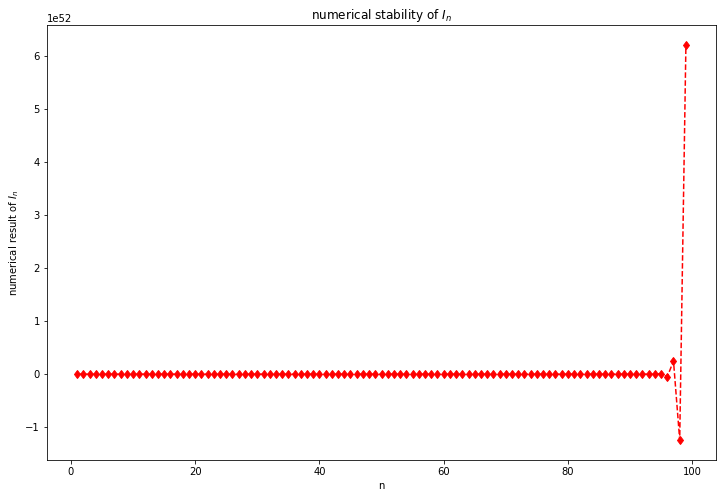

In [24]:
# 1-3，通过迭代公式计算 I_n 的值
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8)) 
#
ik=np.log(6/5) # value of I_0
lst=[]
for i in range(1,100):
    ik=-5*ik+1/i
    lst.append(ik)
x=np.linspace(1,99,99)
plt.plot(x,lst,'rd--')
plt.xlabel('n')
plt.ylabel('numerical result of $I_n$')
plt.title('numerical stability of $I_n$')
plt.savefig('numerical_stability_of_I.png')
plt.show

## 2 矩阵的模与条件数

> #### 考虑上三角矩阵$\,A\in\mathbb{R}^{n\times n}\,$,其所有对角元为$\,1\,$，其余上三角矩阵元为$\,-1\,$.
#### (a) 计算$\,A\,$的行列式，说明其为非奇异矩阵
#### (b) 给出其逆矩阵$\,A^{-1}\,$的形式
#### (c) 如果采用矩阵的$p$模定义，说明$\,p\to \infty\,$时，所谓的$\infty$模为$\;\|A\|_{\infty}=\displaystyle\sup_{x\ne0}\frac{\|Ax\|_{\infty}}{\|x\|_{\infty}}=\displaystyle\max_{i=1,\dots,n} \sum_{j=1}^{n}|a_{ij}|\;$
#### (d) 采用$\,p=2\,$的欧式模$\,\|\cdot\|_2$，对于一个幺正矩阵$\,U\in \mathbb{C}^{n\times n}\,$，证明$\,\|U\|_2=\|U^{\dagger}\|_2=1$；证明$\,\|UA\|=\|A\|\,$；如果使用欧式模定义条件数，证明$\,K_2(UA)=K_2(A)\,$
#### (e) 利用定义$\,K_{\infty}(A)=\|A\|\|A^{-1}\|\,$，计算(a)问中矩阵的条件数。

> (a) solution  
众所周知，对于上三角矩阵的行列式等于其对角线元素的乘积：
$$det(A)=\begin{vmatrix} 1 & -1 & \dots & -1 \\
                        0 & 1 & \dots & -1 \\
                        \dots & \dots & \dots & \dots \\
                        0 & 0 & \dots & 1
\end{vmatrix}=\displaystyle\sum_{\pi \in P}sign(\pi)a_{1\pi_1}a_{2\pi_2}\dots a_{n\pi_n}=a_{11} a_{22} \dots a_{nn}=1$$
所以$\,A\,$是非奇异的。


> (b) solution  
记$\,B_{ij}\,$是将矩阵第$\,j\,$行加到第$\,i\,$行的变换矩阵，显然可以构造行变换矩阵$\,P\,$(显然是非奇异的)使$$P A=(B_{12}B_{13}\dots B_{1n})(B_{23}B_{24}\dots B_{2n})\dots (B_{(n-1)n})A=I$$
则$\,A^{-1}P^{-1}=I^{-1}=I$，得到
$$A^{-1}=PI=(B_{12}B_{13}\dots B_{1n})(B_{23}B_{24}\dots B_{2n})\dots (B_{(n-1)n})I=\begin{pmatrix}
    1 & 2 & \dots & n \\
    0 & 1 & \dots & n-1 \\
    \dots & \dots & \dots & \dots \\
    0 & 0 & 0 & 1
\end{pmatrix}$$

> (c) solution  
首先一般矢量的$\,p=\infty\,$模，我们有结论：$\|\overrightarrow{x}\|_{\infty}=max\{\mid x_i\mid\}=\mid x\mid_{max}$
所以：
$$\|A\overrightarrow{x}\|_{\infty}=\|\sum_{j}a_{ij}x_j\|_{\infty}=max\{\mid \sum_{j}a_{ij}x_j\mid\}\le max\{\mid \sum_{j}a_{ij}\mid \mid x\mid_{max} \} \\
=\mid x\mid_{max} max\{\mid \sum_{j}a_{ij}\mid \}= \|\overrightarrow{x}\|_{\infty} max\{\mid \sum_{j}a_{ij}\mid \} $$
因而：
$$\frac{\|Ax\|_{\infty}}{\|x\|_{\infty}} \le \displaystyle\max_{i=1,\dots,n} \sum_{j=1}^{n}|a_{ij}|\;$$
同时可以构造一个合适的$\,\overrightarrow{x}=(x_1,\dots,x_n)\,$令$\, x_1 = x_2 = \dots = x_n = x_0 \,$，此时：
$$\|A\overrightarrow{x}\|_{\infty}=\|\sum_{j}a_{ij}x_j\|_{\infty}=max\{\mid \sum_{j}a_{ij}x_j\mid\}=\mid x_0 \mid max\{\mid \sum_{j}a_{ij}\mid \} =  \|\overrightarrow{x}\|_{\infty} max\{\mid \sum_{j}a_{ij}\mid \} $$
等号是可以取到的，因此：
$$\;\|A\|_{\infty}=\displaystyle\sup_{x\ne0}\frac{\|Ax\|_{\infty}}{\|x\|_{\infty}} = \displaystyle\max_{i=1,\dots,n} \sum_{j=1}^{n}|a_{ij}|\;$$
Q.E.D

> (d) solution  
a) 向量的p2模可以写作：$\|\overrightarrow{x}\|=\sqrt{\sum_{i}x_i^{*}x_i}$
考虑到：$\,\|Ux\|_{2} = \|\sum_{j}U_{ij}x_j\|_{2} = \sqrt{ \sum_{ij}x_j^{*}U^*_{ij}U_{ij}x_j } = \sqrt{ \sum_{ij}x_j^{*}U^{\dagger}_{ji}U_{ij}x_j } $  
注意到幺正矩阵定义：$U^{\dagger}U=\sum_{i}U^{\dagger}_{ji}U_{ij}=I\,$，即有：$$ \|Ux\|_{2} =  \sqrt{ \sum_{ij}x_j^{*}U^{\dagger}_{ji}U_{ij}x_j } = \sqrt{ \sum_{j}x_j^{*}x_j } = \|x\|_{2}$$
综上：$$\|U\|_{2} = sup\big\{ \frac{\|Ux\|_{2}}{\|x\|_{2}} \big\}= sup\big\{ \frac{\|x\|_{2}}{\|x\|_{2}} \big\}= 1 $$
同理可以得到：$\|U^{\dagger}x\|_{2}=\|x\|_{2}$，亦因而也有：$\|U^{\dagger}\|_2=1 \:$  
(证明中仅用到了幺正矩阵的性质，幺正矩阵的厄米共轭亦为幺正矩阵，推广是显然的)  
b) 对于$\,UA\,$，考虑作用在一个矢量上：
$$\|UAx\|_2=\|\sum_{ij}U_{ki}A_{ij}x_j\|_2=\sqrt{\sum_{ijk}x^*_{j}A^*_{ij}U^*_{ki}U_{ki}A_{ij}x_j}\\
=\sqrt{\sum_{ij}x^*_{j}A^*_{ij}\sum_{k}(U^{\dagger}_{ik}U_{ki})A_{ij}x_j}=\sqrt{\sum_{ij}x^*_{j}A^*_{ij}A_{ij}x_j}=\|\sum_{i}A_{ij}x_j\|_2=\|Ax\|_2$$
所以：$\|UA\|_2=sup\{\frac{\|UAx\|_2}{\|x\|_2}\} = sup\{\frac{\|Ax\|_2}{\|x\|_2}\}=\|A\|_2$  
并且还有  
$$sup\big\{\frac{\|AUx\|_2}{\|x\|_2}\big\}=sup\big\{\frac{\|AUx\|_2}{\|Ux\|_2}\big\}=sup\big\{\frac{\|Ay\|_2}{\|y\|_2}\big\}$$
所以也有：$\|AU\|_2=\|A\|_2$，同理$\,\|AU^{\dagger}\|_2=\|A\|_2\,$也是显然的。  
c) 对于欧氏模下的条件数，利用上述题目中的结论：
$$ K_2(UA)=\|UA\|_{2}\|(UA)^{-1}\|_{2} = \|UA\|_{2}\|A^{-1}U^{-1}\|_{2} \\
= \|UA\|_{2}\|A^{-1}U^{\dagger}\|_{2} = \|A\|_{2}\|A^{-1}\|_{2}=K_2(A)$$
Q.E.D.

> (e) solution  
按照题意以及前两问中求出的结果：  
$$\;\|A\|_{\infty}=\displaystyle\max_{i=1,\dots,n} \sum_{j=1}^{n}|a_{ij}|=\displaystyle\max_{i=1,\dots,n}\mid (i-1)\mid=n-1\;$$ 
$$\;\|A^{-1}\|_{\infty}=\displaystyle\max_{i=1,\dots,n} \sum_{j=1}^{n}|a_{ij}|=\displaystyle\max_{i=1,\dots,n}\mid \frac{1}{2}i(i+1)\mid=\frac{1}{2}n(n+1)\;$$  
所以：  
$$ K_{\infty}(A)=\|A\|_{\infty}\|A^{-1}\|_{\infty} = \frac{1}{2}(n-1)n(n+1)$$

## Hilbert 矩阵

#### (a) 考虑区间$\,[0,1]\,$上的任意函数$\,f(x)\,$，使用一个$\,n-1\,$次的多项式$\,P_n=\displaystyle\sum_{i=1}^{n}c_{i}x^{i-1}\,$来近似$\,f\,$,因而构造两者之间的差的平方的积分：$$\,D=\displaystyle\int_{0}^{1}dx\big(\displaystyle\sum_{i=1}^{n}c_{i}x^{i-1}-f(x)\big)^2$$如果我们要求$\,D\,$有最小值，说明各个系数$\,c_i\,$满足的方程为：$$\sum_{j=1}^{n}(H_n)_{ij}c_{j}=b_i$$或写成矩阵形式$\,H_n\cdot c=b\,$，其中$c,b\in \mathbb{R}^n$，而$\,H_n\in \mathbb{R}^{n\times n}\,$称为Hilbert矩阵。给出矩阵$\,H_n\,$的表达式和矢量$\,b\,$的表达式。
#### (b) 证明$\,H_n\,$是对称正定矩阵，即$\,\forall c\in \mathbb{R}^{n},c^{T}\cdot H_nc\ge 0\,$，等号仅仅在$\,c=0\,$时取得；论证Hilbert矩阵是非奇异的。
#### (c) 虽然$\,H_n\,$是非奇异的，但行列式随$\,n\,$增大而迅速减小，有如下表达式：$$det(H_n)=\frac{c_n^4}{c_{2n}},\:c_{n}=1!\cdot 2!\dots (n-1)!$$因此$\,det(H_n)\,$随$\,n\,$增大而迅速指数减小。利用上述表达式，估计出$\,det(H_n),\:n\le 10\,$的数值。(提示取对数)
#### (d) 因为Hilbert矩阵的近奇异性，会有非常大的条件数，因此求解它的线性方程时，误差会被放大。写两个程序，分别用GEM和Cholesky分解求方程$\,H_n\cdot x=b,\: b=(1,1,\dots,1)\in \mathbb{R}^{n}\,$，逐步增加n，两种方法的解有差别吗？如果有，你认为哪一个更为精确，说明理由。

> #### (a) solution
显然题目要求$D$关于$c_i$的偏导数都应该为0，即：
$$\frac{\partial D}{\partial c_i}=\frac{\partial}{\partial c_i}\displaystyle\int_{0}^{1}dx \big(\sum_{j=1}^{n}c_j x^{j-1}-f(x)\big)^2=2\displaystyle\int_{0}^{1}dx \big(\sum_{j=1}^{n}c_j x^{j-1}-f(x)\big)x^{i-1}=0$$
$$\displaystyle\sum_{j=1}^{n}\big(\displaystyle\int_{0}^{1} x^{i+j-2}dx\big)c_j=\displaystyle\int_{0}^{1}f(x) x^{i-1}dx$$
显然可以记$(H_n)_{ij}=\displaystyle\int_{0}^{1} x^{i+j-2}dx=\frac{1}{i+j-1}\,$，同时记$\,b_i=\displaystyle\int_{0}^{1}f(x) x^{i-1}dx\,$为列向量，$c_j$亦为列向量，则有:
$$\sum_{j=1}^{n}(H_n)_{ij}c_{j}=b_i\,$$
Q.E.D.

> #### (b) solution
对称是显然的：$(H_n)_{ij}=\frac{1}{i+j-1}=(H_n)_{ji}$，而正定性可以根据：
$$c^{T}\cdot Hc=\sum_{ij}c_iH_{ij}c_j=\sum_{ij}c_i c_j\displaystyle\int_{0}^{1} x^{i+j-2}dx=\displaystyle\int_{0}^{1}(\sum_{ij}c_i c_j x^{i+j-2})$$
定义向量函数$\overrightarrow{d}(x)$的分量$d_i(x)=c_i x^{i-1}$则，$\displaystyle\int_{0}^{1}dx(\sum_{ij}c_i c_j x^{i+j-2})=\displaystyle\int_{0}^{1}dx(\sum_{ij}d_i(x) d_j(x) ) = \displaystyle\int_{0}^{1}dx(\sum_{i}d_i(x))^2 \ge 0 $  
显然，等号成立的条件是对于任意(无穷多的)的$\,x \in [0,1]\,$，应该有：$\sum_{i}d_i(x)=\sum_{i}c_ix^{i-1}=0$，显然因为$x$是可以任意选取的，只能$\,c_1=c_2=\dots=c_n=0\,$  
Q.E.D.

> #### (c) solution
根据题意取对数(注意是自然对数)  
$$ln(det(H_n))=4ln(c_n)-ln(c_{2n})=4\sum_{k=1}^{n}ln(k-1)!-\sum_{k=1}^{2n}ln(k-1)!\\
=ln(det(H_{n-1}))+4ln(n-1)!-ln(2n-1)!-ln(2n-2)!$$  
a)首先就可以通过数值方法，利用$\,ln(det(H_1))=0\,$以及上述递推式求解$\,ln(det(H_n))\,$，得到的结果如下述程序所示：  
b)或者根据stirling公式：$$\displaystyle {\sqrt {2\pi }}\ n^{n+{\frac {1}{2}}}e^{-n}\leq n!\leq e\ n^{n+{\frac {1}{2}}}e^{-n}$$
可以有近似估计：
$$\begin{eqnarray} 
&ln(det(H_n))&=&ln(det(H_{n-1}))+4ln(n-1)!-ln(2n-1)!-ln(2n-2)!\\
&&\le& ln(det(H_{n-1}))+4(n-1/2)ln(n-1)-4(n-1)+4\\
&&&-(2n-1/2)ln(2n-1)+(2n-1)-(2n-3/2)ln(2n-2)+(2n-2)-ln2\pi\\
&&\le& ln(det(H_{n-1}))+(4n-2)ln(n-1)-4(n-2)-(4n-2)ln(2n-2)+(4n-3)-ln2\pi \\
&&=& ln(det(H_{n-1}))-(4n-2)ln2+5-ln2\pi \\
&&=& \sum_{k=2}^n[-(4k-2)ln2+5-ln2\pi]\\
&&=& (n-1)(-2nln2+5-ln16\pi)\\
\end{eqnarray}$$
(当然还可以做更精确的上界估计，不过已经可以看出来，其行列式的变化趋势为：$det(H_n) \sim exp（-O(n^2))$，是随n急剧下降的，这在模拟的数值结果中也可以直观地反映出来，图中以蓝线表示)

[   0.           -2.48490665   -7.6778635   -15.6152382   -26.30945326
  -39.76620671  -55.98858021  -74.97842733  -96.73694927 -121.26496875]


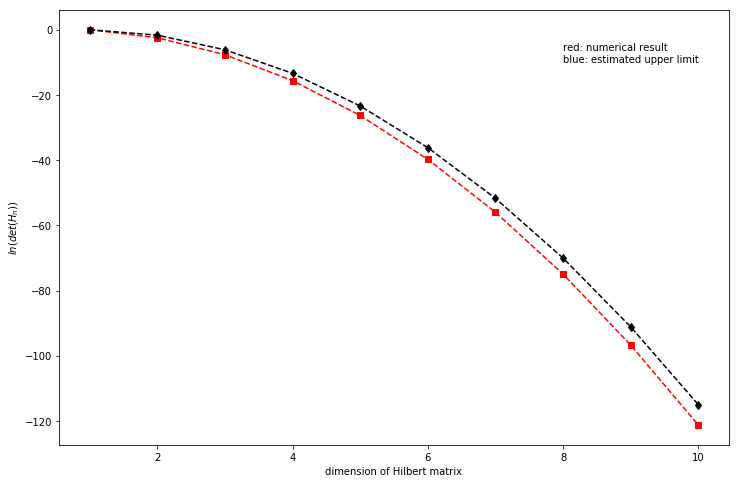

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
#
n=10
lndet=np.zeros(n)
# 注意是从0开始计数的
for i in range(1,n):
    lndet[i]=lndet[i-1]
    s=0
    for j in range(0,2*i):
        s=s+2*np.log(j//2+1) - 2*np.log(j+1)
    s=s-np.log(2*i+1)
    lndet[i]=lndet[i]+s
print(lndet)
dn=np.linspace(1,10,10)
theo=np.multiply(dn-1,-2*np.log(2)*dn+5-np.log(16*3.1415926))
plt.plot(dn,lndet,'rs--',dn,theo,'kd--')
plt.xlabel('dimension of Hilbert matrix')
plt.ylabel('$ln(det(H_n))$')
plt.text(8,-10,'red: numerical result'+'\n'+'blue: estimated upper limit')
plt.savefig('calc_lndet_Hn.png')
plt.show()

> (d) solution  
首先可以进行如下数值分析，计算$\,n=2\sim13\,$的两种算法所获得的解的差的模值，其对数对Hilbert矩阵的阶数作图，可见随Hilbert矩阵的维数增大，两种算法之间的差别几乎成指数级增长（表现为对数图上的线性增长）。

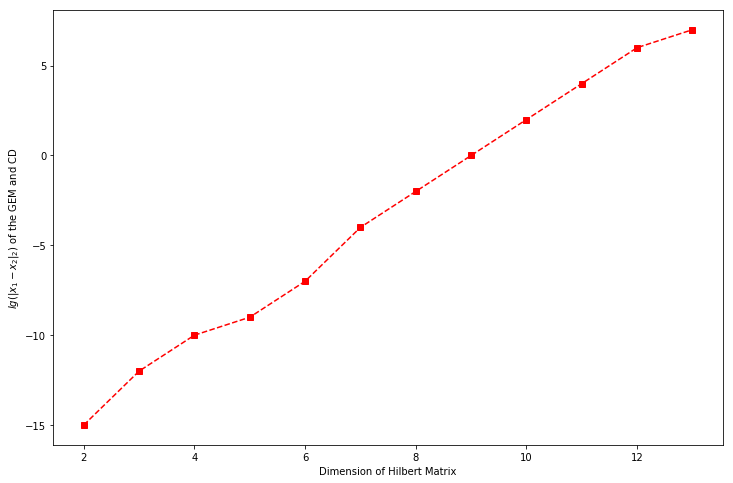

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))

hgh=12
lst=np.arange(hgh)
for n in range(2,hgh+2):
######################### construct Hilbert Matrix ######################
    Hbt=np.zeros((n,n))
    # i,j from 0 to count
    for i in range(n):
        for j in range(n):
            Hbt[i,j]=1/(i+j+1)
################################## GEM process ################################
    G=Hbt.copy()
    b=np.ones(n)
    for i in range(n):
        if (G[i,i] == 0):
            break
        for j in range(i+1,n):
            lmd = - G[j,i]/G[i,i]
            for k in range(i,n):
                G[j,k]=G[j,k] + lmd * G[i,k]
            b[j]=b[j] + lmd * b[i]
    #print(G)
    x1=np.zeros(n)
    for i in range(n-1,-1,-1):
        s=b[i]
        for j in range(i+1,n):
            s = s - G[i,j] * x1[j]
        x1[i] = s/G[i,i]
####################### following do Cholesky decomposition ####################
    H=Hbt.copy()
    H[0,0]=np.sqrt(H[0,0])
    for i in range(1,n):
        for j in range(i):
            for k in range(j):
                H[i,j]=H[i,j]-H[i,k]*H[j,k]
            H[i,j]=H[i,j]/H[j,j]
        for k in range(i):
            H[i,i]=H[i,i]-H[i,k]**2
        H[i,i]=np.sqrt(H[i,i])
    #print(H)
    x2=y=np.zeros(n)
    for i in range(0,n):
        s=1
        for j in range(0,i):
            s = s - H[i,j] * y[j]
        y[i] = s/H[i,i]
    #print(y)
    for i in range(n-1,-1,-1):
        s=y[i]
        for j in range(i+1,n):
            s = s - H[j,i] * x2[j]
        x2[i] = s/H[i,i]
    #
    dx=x1-x2
    #print('error between CD and GEM: n=',n,', err=',np.sqrt( np.multiply(dx,dx).sum() ))
    lst[n-2]=np.log10( np.sqrt( np.multiply(dx,dx).sum() ) )
n2=np.linspace(2,hgh+1,hgh)
plt.plot(n2,lst,'rs--')
plt.xlabel('Dimension of Hilbert Matrix')
plt.ylabel(r'$lg(\|x_1-x_2\|_2)$ of the GEM and CD')
plt.savefig('comp_GEM_and_CD.png')
plt.show()

> 两种算法之间的差别是明显的，这里认为Cholesky分解的解法是更精确的，因为Cholesky利用了正定对称矩阵的性质，计算不会出现系数矩阵的转动误差，因而数值稳定性更好，同时计算量要比高斯消元法少，结果也更为精确。  
(其中还值得注意的一点是，将两个方法的解回代，去拟合方程中矢量$\,b\,$的误差，这两种方法的回代误差接近且都很小(因此不能用这种方法判断谁的解更为可靠)，可见Hilbert矩阵本身非常接近奇异的特点，如下程序和图示)

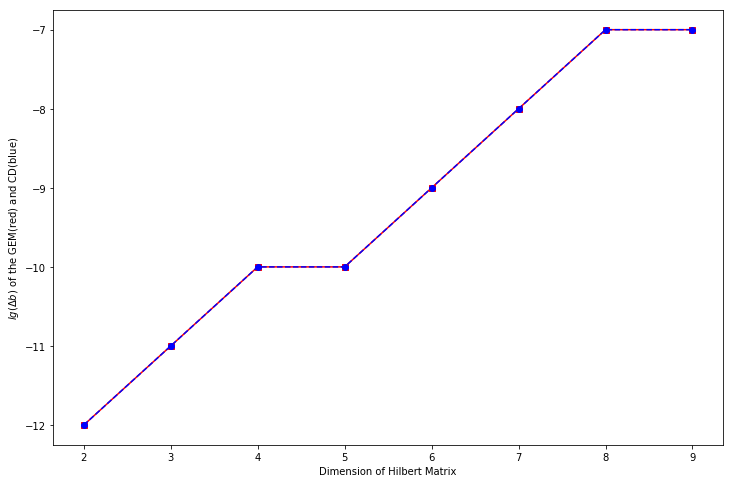

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))

hgh=8
lb1=lb2=np.arange(hgh)
for n in range(6,hgh+6):
######################### construct Hilbert Matrix ######################
    Hbt=np.zeros((n,n))
    # i,j from 0 to count
    for i in range(n):
        for j in range(n):
            Hbt[i,j]=1/(i+j+1)
################################## GEM process ################################
    G=Hbt.copy()
    b=np.ones(n)
    for i in range(n):
        if (G[i,i] == 0):
            break
        for j in range(i+1,n):
            lmd = - G[j,i]/G[i,i]
            for k in range(i,n):
                G[j,k]=G[j,k] + lmd * G[i,k]
            b[j]=b[j] + lmd * b[i]
    #print(G)
    x1=np.zeros(n)
    for i in range(n-1,-1,-1):
        s=b[i]
        for j in range(i+1,n):
            s = s - G[i,j] * x1[j]
        x1[i] = s/G[i,i]
####################### following do Cholesky decomposition ####################
    H=Hbt.copy()
    H[0,0]=np.sqrt(H[0,0])
    for i in range(1,n):
        for j in range(i):
            for k in range(j):
                H[i,j]=H[i,j]-H[i,k]*H[j,k]
            H[i,j]=H[i,j]/H[j,j]
        for k in range(i):
            H[i,i]=H[i,i]-H[i,k]**2
        H[i,i]=np.sqrt(H[i,i])
    #print(H)
    x2=y=np.zeros(n)
    for i in range(0,n):
        s=1
        for j in range(0,i):
            s = s - H[i,j] * y[j]
        y[i] = s/H[i,i]
    #print(y)
    for i in range(n-1,-1,-1):
        s=y[i]
        for j in range(i+1,n):
            s = s - H[j,i] * x2[j]
        x2[i] = s/H[i,i]
    #
    db1=np.dot(Hbt, x1)-np.ones(n)
    db2=np.dot(Hbt, x2)-np.ones(n)
    lb1[n-6]=np.log10( np.sqrt( np.multiply(db1,db1).sum()) )
    lb2[n-6]=np.log10( np.sqrt( np.multiply(db2,db2).sum()) )
n2=np.linspace(2,hgh+1,hgh)
plt.plot(n2,lb1,'rs-',n2,lb2,'bo--')
plt.ylim=((0,10**(-9)))
plt.xlabel('Dimension of Hilbert Matrix')
plt.ylabel(r'$lg(\Delta b)$ of the GEM(red) and CD(blue)')
plt.savefig('comp_GEM_and_CD_2.png')
plt.show()